In [29]:
!git config --global user.name "MatiasColladoCA"
!git config --global user.email "matias.collado.w@gmail.com"

!git clone https://github.com/MatiasColladoCA/DS_books_recomendations /content/drive/MyDrive/Colab_Notebooks/DSBooks/repo

# %cd /content/drive/MyDrive/Colab_Notebooks/DSBooks/




Cloning into '/content/drive/MyDrive/Colab_Notebooks/DSBooks/repo'...
/content/drive/MyDrive/Colab_Notebooks/DSBooks


In [27]:
%cd /content/drive/MyDrive/Colab_Notebooks/DSBooks/
%ls

/content/drive/MyDrive/Colab_Notebooks/DSBooks
DS_books_recomendations2.ipynb


In [31]:
%ls
import shutil

%cd /content/drive/MyDrive/Colab_Notebooks/DSBooks/repo
# Cambia el nombre del archivo y directorio según corresponda
shutil.copy('/content/drive/MyDrive/Colab_Notebooks/DSBooks/DS_books_recomendations2.ipynb', '.')




DS_books_recomendations2.ipynb  repo/
/content/drive/MyDrive/Colab_Notebooks/DSBooks/repo


'./DS_books_recomendations2.ipynb'

In [35]:
!git add DS_books_recomendations2.ipynb
!git commit -m "Añadir notebook desde Google Colab"

# Si el repositorio es privado, configura el token de acceso personal
import getpass
token = getpass.getpass('Ingrese su token de acceso personal de GitHub: ')
!git remote set-url origin https://github.com/MatiasColladoCA/DS_books_recomendations

# Empuja los cambios al repositorio remoto
!git push origin main


On branch main
Your branch is based on 'origin/main', but the upstream is gone.
  (use "git branch --unset-upstream" to fixup)

nothing to commit, working tree clean
Ingrese su token de acceso personal de GitHub: ··········
fatal: could not read Username for 'https://github.com': No such device or address


In [3]:
#Esto permite cargar las carpetas de nuestro google Drive para trabajar hasta
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install dask distributed --upgrade
!pip install dask[dataframe]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.3 MB/s eta 0:00:00
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 2.2.1
    Uninstalling cloudpickle-2.2.1:
      Successfully uninstalled cloudpickle-2.2.1
  Attempting uninstall: dask
    Found existing installation: dask 2024.7.1
    Uninstalling dask-2024.7.1:
      Successfully uninstalled dask-2024.7.1
  Attempting uninstall: distributed
    Found existing installation: distributed 2024.7.1
    Uninstalling distributed-2024.7.1:
      Successfully uninstalled distributed-2024.7.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.1 MB/s eta 0:00:00


In [ ]:
import gzip
import pandas as pd

input_file_path = '/content/drive/MyDrive/DataScienceProjects/goodreads_books.json.gz'
output_file_path = '/content/drive/MyDrive/DataScienceProjects/goodreads_books_half.csv'

with gzip.open(input_file_path, 'rt') as f_in:
    # Leer el archivo JSON
    df = pd.read_json(f_in, lines=True)

# Seleccionar la mitad del dataset
half_df = df.sample(frac=0.5, random_state=42)

# Guardar el nuevo dataset como CSV
half_df.to_csv(output_file_path, index=False)



Archivo descomprimido y guardado en: /content/drive/MyDrive/DataScienceProjects/goodreads_books.json


In [ ]:
#ya monté drive ahora quiero cargar este archivo DataScienceProject/goodreads_interactions.csv

import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

js_books =  dd.read_json('/content/drive/MyDrive/DataScienceProjects/goodreads_books.json', encoding="latin-1", lines=True)
js_genres =  dd.read_json('/content/drive/MyDrive/DataScienceProjects/goodreads_book_genres_initial.json', encoding="latin-1", lines=True)
inter =  dd.read_csv('/content/drive/MyDrive/DataScienceProjects/goodreads_interactions.csv', delimiter=";", encoding="latin-1", on_bad_lines='skip')

In [ ]:
# !tar -xzvf "/content/drive/path/file_name.tar.gz" "/content/drive/path/destination_directory"

In [ ]:
print("hola")

hola


In [ ]:
def flatten_json(df):
    # df es un DataFrame con una columna que contiene las cadenas JSON
    return pd.json_normalize(df.to_dict(orient='records'))

js_books_flattened = js_books.map_partitions(flatten_json)

# 3. Seleccionar columnas necesarias
# columns_to_keep = ['isbn', 'title', 'authors', 'publisher', 'publication_year', 'average_rating']
# js_books_filtered = js_books_flattened

# 4. Convertir a pandas DataFrame
df_pandas = js_books_flattened.compute()

# 5. Mostrar las primeras filas del DataFrame resultante
print(df_pandas.head())

NameError: name 'js_books' is not defined

In [ ]:
# Define los nombres de las columnas
column_names = ['isbn', 'text_reviews_count', 'series', 'country_code', 'language_code', 'popular_shelves',
                 'asin', 'is_ebook', 'average_rating', 'kindle_asin', 'similar_books', 'description',
                 'format', 'link', 'authors', 'publisher', 'num_pages', 'publication_day',
                 'publication_month', 'edition_information', 'publication_year', 'url', 'image_url',
                 'book_id', 'ratings_count', 'work_id', 'title', 'title_without_series']

# Crear el DataFrame de pandas especificando las columnas
books = pd.DataFrame(df_pandas, columns=column_names)

# data = []
# books = pd.DataFrame([data.append(json.loads(line)) for line in js_books.readlines()])
# books.head(10)

#Ver dimensiones del df_books
# print(books.shape)

In [ ]:
books.shape()

TypeError: 'tuple' object is not callable

# Entendimiento y limpieza de los datos

## Tratamiento de df_books

In [ ]:
from io import StringIO


def show_info(df, text):
  # Visualizar información de df_books
  info_str = []

  # Agregar la salida de head()
  info_str.append(f"Head of {text}:")
  info_str.append(df.head().to_string())
  info_str.append(f"-------------------------")


  # Agregar la salida de describe()
  info_str.append(f"\n\nDescription of {text}:")
  info_str.append(df.describe().to_string())
  info_str.append(f"-------------------------")


  # Agregar la salida de info()
  info_str.append(f"\n\nInfo of {text}:")
  buffer = StringIO()
  df.info(buf=buffer)
  info_str.append(buffer.getvalue())
  info_str.append(f"-------------------------")


  # Agregar la salida de dtypes
  info_str.append(f"\n\nData types of {text}:")
  info_str.append(df.dtypes.to_string())
  info_str.append(f"-------------------------")

  print("\n".join(info_str))

In [ ]:
df_books.head()

,"{""isbn"": ""0312853122"", ""text_reviews_count"": ""1"", ""series"": [], ""country_code"": ""US"", ""language_code"": """", ""popular_shelves"": [{""count"": ""3"", ""name"": ""to-read""}, {""count"": ""1"", ""name"": ""p""}, {""count"": ""1"", ""name"": ""collection""}, {""count"": ""1"", ""name"": ""w-c-fields""}, {""count"": ""1"", ""name"": ""biography""}], ""asin"": """", ""is_ebook"": ""false"", ""average_rating"": ""4.00"", ""kindle_asin"": """", ""similar_books"": [], ""description"": """", ""format"": ""Paperback"", ""link"": ""https://www.goodreads.com/book/show/5333265-w-c-fields"", ""authors"": [{""author_id"": ""604031"", ""role"": """"}], ""publisher"": ""St. Martin's Press"", ""num_pages"": ""256"", ""publication_day"": ""1"", ""isbn13"": ""9780312853129"", ""publication_month"": ""9"", ""edition_information"": """", ""publication_year"": ""1984"", ""url"": ""https://www.goodreads.com/book/show/5333265-w-c-fields"", ""image_url"": ""https://images.gr-assets.com/books/1310220028m/5333265.jpg"", ""book_id"": ""5333265"", ""ratings_count"": ""3"", ""work_id"": ""5400751"", ""title"": ""W.C. Fields: A Life on Film"", ""title_without_series"": ""W.C. Fields: A Life on Film""}"
0,"{""isbn"": ""0743509986"", ""text_reviews_count"": ""..."
1,"{""isbn"": """", ""text_reviews_count"": ""7"", ""serie..."
2,"{""isbn"": ""0743294297"", ""text_reviews_count"": ""..."
3,"{""isbn"": ""0850308712"", ""text_reviews_count"": ""..."
4,"{""isbn"": ""1599150603"", ""text_reviews_count"": ""..."


In [ ]:
# Ver df_books
show_info(df_books, "df_books")

Head of df_books:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
#Cambiar nombres de columnas
df_books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']
# #ignoramos las columnas que no usaremos
df_books.drop(['imageURLS','imageURLM','imageURLL'], axis=1, inplace=True)

# Concatenar toda la información en una sola cadena y mostrarla
print("\n".join(info_str))

#Añado una mejor visualización a la ultima salida dtypes
for col in df_books.columns:
    # unique_values = df_books[col].unique()
    unique_types = df_books[col].apply(type).unique()

    print(f"Columna '{col}':")
    print(f"  Tipos de datos únicos: {unique_types}\n")

NOTAS

Incluir genero por libro. Como cada libro tiene varios generos y una de las cosas que quiero hacer es


Los dropna no se harán hasta tratar todos los tipos por columna. Una vez acumulados todos los NaN se verá la proporción y luego se eliminarán si son una proporción <3%

CORRECCIÓN DE TIPOS POR COLUMNA

In [ ]:
# bookAuthor
# Proporción de datos de cada tipo por columna

tipos = df_books['bookAuthor'].apply(type).value_counts()

# Imprimir la proporción de cada tipo de dato
print("Proporción de tipos de datos en 'bookAuthor':")
print(tipos / len(df_books['bookAuthor']))

Proporción de tipos de datos en 'bookAuthor':
bookAuthor
<class 'str'>      0.999993
<class 'float'>    0.000007
Name: count, dtype: float64


In [ ]:

# Imprimir cantidad y proporción de cada tipo de dato
print("Proporción de tipos de datos en 'bookAuthor':")
print(
    f"Datos str: {tipos.iloc[0]}\n"
    f"Datos float: {tipos.iloc[1]}\n"
    f"Proporciones: {tipos / len(df_books['bookAuthor'])}")

Proporción de tipos de datos en 'bookAuthor':
Datos str: 271358
Datos float: 2
Proporciones: bookAuthor
<class 'str'>      0.999993
<class 'float'>    0.000007
Name: count, dtype: float64


In [ ]:
# Ver datos de tipo erroneo

# Filtrar las filas donde 'bookAuthor' es de tipo float
float_rows = df_books[df_books['bookAuthor'].apply(type) == float]

# Mostrar las primeras filas de estas filas filtradas
print("\nHead de los datos donde 'bookAuthor' es de tipo float:")
print(float_rows.head())


Head de los datos donde 'bookAuthor' es de tipo float:
              ISBN                                          bookTitle  \
118033  0751352497                           A+ Quiz Masters:01 Earth   
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

       bookAuthor yearOfPublication                       publisher  
118033        NaN              1999              Dorling Kindersley  
187689        NaN              1995  Edinburgh Financial Publishing  


In [ ]:
#convertir a NaN si es float
# import numpy as np

# Función para convertir datos tipo float a NaN
# def replace_floats_with_nan(x):
#     if isinstance(x, (float, int)):  # Verificar si es un número (float o int)
#         return np.nan
#     return x

# # Aplicar la función a la columna
# df_books['bookAuthor'] = df_books['bookAuthor'].apply(replace_floats_with_nan)

# # Mostrar cantidad de NaN
# print(df_books['bookAuthor'].isna().sum())

# df_books['bookAuthor'].head()

---

In [ ]:
#yearOfPublication
#Proporción de datos de tipo erroneo por columna

tipos = df_books['yearOfPublication'].apply(type).value_counts()

# Imprimir la proporción de cada tipo de dato
print("Proporción de tipos de datos en 'yearOfPublication':")
print(tipos / len(df_books['yearOfPublication']))

Proporción de tipos de datos en 'yearOfPublication':
yearOfPublication
<class 'int'>    0.758491
<class 'str'>    0.241509
Name: count, dtype: float64


In [ ]:
# Cantidad de datos de cada tipo por columna
# Imprimir cantidad y proporción de cada tipo de dato
print("Proporción de tipos de datos en 'yearOfPublication':")
print(
    f"Datos int: {tipos.iloc[0]}\n"
    f"Datos str: {tipos.iloc[1]}\n"
    f"Proporciones: {tipos / len(df_books['yearOfPublication'])}")

Proporción de tipos de datos en 'yearOfPublication':
Datos int: 205824
Datos str: 65536
Proporciones: yearOfPublication
<class 'int'>    0.758491
<class 'str'>    0.241509
Name: count, dtype: float64


In [ ]:
# Filtrar las filas donde 'yearOfPublication' es de tipo string
string_rows = df_books[df_books['yearOfPublication'].apply(type) == str]

# Mostrar las primeras filas de estas filas filtradas
print("\nHead de los datos donde 'yearOfPublication' es de tipo float:")
print(string_rows.iloc[100:150])


Head de los datos donde 'yearOfPublication' es de tipo float:
              ISBN                                          bookTitle  \
196708  0380719991                             Scramble for Africa...   
196709  0836287886           Confessions To My Mother-Cathy Guisewite   
196710  0679432043  Last Days in Cloud Cuckooland: Dispatches from...   
196711  0618196781                                Paddington at Large   
196712  1401020925                             The Mourning of Angels   
196713  0812218019  The Hundred Years War: Trial by Fire (The Midd...   
196714  0812216555  The Hundred Years War: Trial by Battle (The Mi...   
196715  0582468949  Penguin Quick Guides: Common Errors in English...   
196716  8472794628  El sol hi era alegre: La reforma urbanÃ­stica ...   
196717  0312278713                            Under the Frog: A Novel   
196718  0826470726                       Lesson Planning (Classmates)   
196719  1577193253                             Humphrey Suits

In [ ]:
# Los errores de tipo incorrecto son el 24% por lo que primero se convertirán a int los numeros entre comillas
# Convertir 'yearOfPublication' a numérico, convirtiendo los valores no numéricos a NaN
df_books['yearOfPublication'] = pd.to_numeric(df_books['yearOfPublication'], errors='coerce').astype('Int64')

# Verificar si la conversión fue exitosa
tipos = df_books['yearOfPublication'].apply(type).value_counts()

# Imprimir la proporción de cada tipo de dato en 'yearOfPublication'
print("Proporción de tipos de datos en 'yearOfPublication' después de la conversión inicial:")
print(
    f"Datos float: {tipos.iloc[0]}\n"
    f"Datos NaN: {tipos.iloc[1] if len(tipos) > 1 else 0}\n"
    f"Proporciones: {tipos / len(df_books['yearOfPublication'])}"
)

# Los datos de tipo erroneo eran mayormente numeros entre comillas simples
# Se corrigió pasando de str a int
#Surgieron datos tipo pd.NA

# GoogleColab permite ver información adicional al apoyar el mouse en "tipos"
#Podemos notar que hay muchos datos int = 0 lo que son datos

Proporción de tipos de datos en 'yearOfPublication' después de la conversión inicial:
Datos float: 271357
Datos NaN: 3
Proporciones: yearOfPublication
<class 'int'>                            0.999989
<class 'pandas._libs.missing.NAType'>    0.000011
Name: count, dtype: float64


In [ ]:
# Ordenamos por yearOfPublication en una nueva variable
df_books_sorted = df_books.sort_values(by='yearOfPublication')

# Mostramos valores unicos de menor a mayor
sorted(df_books_sorted['yearOfPublication'].unique(), key=lambda x: (pd.isna(x), x))

# Se observa que se puede considerar invalido cualquier fecha menor a 1376 y mayor a 2017 (año correspondiende a cuando se creó el dataset)

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050,
 <NA>]

In [ ]:
# Convertimos a NaN todo dato menor a 1376 y mayor a 2017
df_books['yearOfPublication'] = df_books['yearOfPublication'].apply(lambda x: np.nan if (pd.notna(x) and (x < 1376 or x > 2017)) else x)

df_books_sorted = df_books.sort_values(by='yearOfPublication')

# Mostramos valores unicos de menor a mayor, manejando pd.NA
sorted_values = df_books_sorted['yearOfPublication'].unique()
sorted_values = [x for x in sorted_values if not pd.isna(x)]  # Removemos pd.NA antes de ordenar
sorted_values.sort()  # Ordenar valores restantes
print(sorted_values)

#Ya converitmos a pd.na todo valor fuera del rango mencionado

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012]


In [ ]:
# Verificar si la conversión fue exitosa
tipos = df_books['yearOfPublication'].apply(type).value_counts()

# Imprimir la proporción de cada tipo de dato en 'yearOfPublication'
print("Proporción de tipos de datos en 'yearOfPublication' después de la conversión inicial:")
print(
    f"Datos float: {tipos.iloc[0]}\n"
    f"Datos NaN: {tipos.iloc[1] if len(tipos) > 1 else 0}\n"
    f"Proporciones: {tipos / len(df_books['yearOfPublication'])}"
)

# Vemos que los datos fuera del rango son el 0.01%

Proporción de tipos de datos en 'yearOfPublication' después de la conversión inicial:
Datos float: 266722
Datos NaN: 4635
Proporciones: yearOfPublication
<class 'int'>                            0.982908
<class 'float'>                          0.017081
<class 'pandas._libs.missing.NAType'>    0.000011
Name: count, dtype: float64


---

In [ ]:
#publisher
#Proporción de datos de tipo erroneo por columna

tipos = df_books['publisher'].apply(type).value_counts()

# Imprimir la proporción de cada tipo de dato en 'yearOfPublication'
print("Proporción de tipos de datos en 'publisher' después de la conversión inicial:")
print(
    f"Datos string: {tipos.iloc[0]}\n"
    f"Datos float: {tipos.iloc[1] if len(tipos) > 1 else 0}\n"
    f"Proporciones: {tipos / len(df_books['publisher'])}"
)

Proporción de tipos de datos en 'publisher' después de la conversión inicial:
Datos string: 271358
Datos float: 2
Proporciones: publisher
<class 'str'>      0.999993
<class 'float'>    0.000007
Name: count, dtype: float64


In [ ]:
# Vemos los valores únicos en esta columna
# Filtrar los valores para mantener solo los strings

print(len(df_books['publisher'].unique())) #len(unique) < len(publisher)
# Reemplazar los valores que son URLs con NaN
# Reemplazar los valores que son URLs con NaN, solo si son strings
df_books['publisher'] = df_books['publisher'].apply(
    lambda x: np.nan if isinstance(x, str) and (x.startswith('http://') or x.startswith('https://')) else x
)
only_str = df_books['publisher'].str.lower()
only_strings = df_books['publisher'].dropna().astype(str)

# Obtener los valores únicos y ordenarlos alfabéticamente
unique_publishers = only_strings.unique()
unique_publishers_sorted = sorted(unique_publishers, reverse=True) #reverse es usado para ver el principio y el final de la lista

# Imprimir los valores únicos
print("Valores únicos en la columna 'publisher':")
# for publisher in unique_publishers_sorted:
    # print(publisher)

print(len(unique_publishers))

16808
Valores únicos en la columna 'publisher':
16804


In [ ]:
#publisher
#Proporción de datos de tipo erroneo por columna

tipos = df_books['publisher'].apply(type).value_counts()

# Imprimir la proporción de cada tipo de dato en 'yearOfPublication'
print("Proporción de tipos de datos en 'publisher' después de la conversión inicial:")
print(
    f"Datos string: {tipos.iloc[0]}\n"
    f"Datos float: {tipos.iloc[1] if len(tipos) > 1 else 0}\n"
    f"Proporciones: {tipos / len(df_books['publisher'])}"
)

Proporción de tipos de datos en 'publisher' después de la conversión inicial:
Datos string: 271355
Datos float: 5
Proporciones: publisher
<class 'str'>      0.999982
<class 'float'>    0.000018
Name: count, dtype: float64


---

In [ ]:
#ISBN
tipos = df_books['ISBN'].apply(type).value_counts()

print("Proporción de tipos de datos en 'publisher' después de la conversión inicial:")
print(
    f"Datos string: {tipos.iloc[0]}\n"
    f"Proporciones: {tipos / len(df_books['ISBN'])}"
)

Proporción de tipos de datos en 'publisher' después de la conversión inicial:
Datos string: 271360
Proporciones: ISBN
<class 'str'>    1.0
Name: count, dtype: float64


---

In [ ]:
# Datos faltantes generales
#Visualizar los datos faltantes generales a modo de upsetplot
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=f4d59f595ecfba4a607d291a9708354e3baa5d8ae77efec942361797044c7780
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


/usr/local/lib/python3.10/dist-packages/upsetplot/data.py:382: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  df = pd.concat(cat_series, axis=1, sort=False)


{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

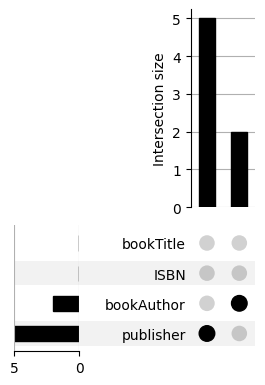

In [ ]:
from upsetplot import UpSet, from_contents, plot
from collections import Counter

data = df_books[['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher']].isna()
# Convertir los datos a un formato compatible con UpSet
contents = {
    'ISBN': data['ISBN'][data['ISBN'] == True].index.tolist(),
    'bookTitle': data['bookTitle'][data['bookTitle'] == True].index.tolist(),
    'bookAuthor': data['bookAuthor'][data['bookAuthor'] == True].index.tolist(),
    # 'yearOfPublication': data['yearOfPublication'][data['yearOfPublication'] == True].index.tolist(),
    'publisher': data['publisher'][data['publisher'] == True].index.tolist(),
}

# Crear un objeto UpSet
upset_data = from_contents(contents)

# Graficar los datos
plot(upset_data)


#Se omite yearOfPublication porque tiene mas de 4 mil datos faltantes y no deja ver el resto

In [ ]:
for col in data:
  print(data[col].value_counts())

ISBN
False    271360
Name: count, dtype: int64
bookTitle
False    271360
Name: count, dtype: int64
bookAuthor
False    271358
True          2
Name: count, dtype: int64
yearOfPublication
False    266722
True       4638
Name: count, dtype: int64
publisher
False    271355
True          5
Name: count, dtype: int64


In [ ]:
# Como los datos faltantes son MCAR
print(df_books.isna().sum())

ISBN                    0
bookTitle               0
bookAuthor              2
yearOfPublication    4638
publisher               5
dtype: int64


In [ ]:
#Evaluar diferencias entre distribución de años imputando valores faltantes en yearOfPublication y eliminandolos

df_books_clean = df_books.dropna(subset=['ISBN', 'bookTitle', 'bookAuthor', 'publisher'])
eliminated = df_books_clean.dropna()

bookAuthor_hist = df_books['bookAuthor'].value_counts()
publisher_hist = df_books['publisher'].value_counts()




plt.tight_layout()
plt.show()
# df_books_clean.isna().sum()
# imputed =

<Figure size 640x480 with 0 Axes>

In [ ]:
# print(f"Cantidad de filas: {len(df_books)}")
print(f"Cantidad de filas: 271360")
print(f"Cantidad de autores :{len(df_books['bookAuthor'].dropna().unique())}")
print(f"Cantidad de imprentas :{len(df_books['publisher'].dropna().unique())}")

Cantidad de filas: 271360
Cantidad de autores :102022
Cantidad de imprentas :16804


In [ ]:
# plt.figure(figsize=(10, 6))
# sns.countplot(x='publisher', data=df_books, palette='viridis')
# plt.xlabel('Publisher')
# plt.ylabel('Conteo')
# plt.title('Conteo de Publishers')
# plt.show()

# # Crear un gráfico de barras apiladas
# crosstab = pd.crosstab(df_books['publisher'], df_books['bookAuthor'])
# crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
# plt.xlabel('Publisher')
# plt.ylabel('Frecuencia')
# plt.title('Distribución de Publishers por Género')
# plt.show()

---

**df_books - Eliminar demas datos faltantes si son <3%**

- Añadir analisis de tipos de datos faltantes (MAR, MNAR y MCAR) para elegir una mejor forma de tratar los datos faltantes y reducir el impacto en el analisis.

- Es preferible si los datos faltantes tienen un patrón no aleatorio, afectan variables importantes o si eliminar los datos podría resultar en una pérdida significativa de información.

- Evaluar el impacto de ambas estrategias (eliminación o imputación de datos faltantes)

NULOS Y DUPLICADOS

In [ ]:
#Evaluamos cantidad de duplicados
df_books.duplicated().sum()*100/len(df_books)

0.0

## Tratamiento de df_rating

In [ ]:
# Visualizar información de df_rating
info_str = []

# Agregar la salida de head()
info_str.append("Head of df_rating:")
info_str.append(df_rating.head().to_string())
info_str.append(f"-------------------------")

# Agregar la salida de describe()
info_str.append("\n\nDescription of df_rating:")
info_str.append(df_rating.describe().to_string())
info_str.append(f"-------------------------")

# Agregar la salida de info()
info_str.append("\n\nInfo of df_rating:")
buffer = StringIO()
df_rating.info(buf=buffer)
info_str.append(buffer.getvalue())
info_str.append(f"-------------------------")

# Agregar la salida de dtypes
info_str.append("\n\nData types of df_rating:")
info_str.append(df_rating.dtypes.to_string())
info_str.append(f"-------------------------")


#Modificamos los nombres de las columnas
df_rating.columns = ['userID', 'ISBN', 'bookRating']


# Concatenar toda la información en una sola cadena y mostrarla
print("\n".join(info_str))


#Añado una mejor visualización a la ultima salida dtypes
for col in df_rating.columns:
    # unique_values = df_books[col].unique()
    unique_types = df_rating[col].apply(type).unique()

    print(f"Columna '{col}':")
    print(f"  Tipos de datos únicos: {unique_types}\n")


Head of df_rating:
   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6
-------------------------


Description of df_rating:
            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01
-------------------------


Info of df_rating:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
mem

NOTA

Los userID pueden estar duplicados porque un userID puede tener muchos ratings. El resto de columnas obviamente pueden estar duplicados

- Corregir descripción porque hay decimales en donde deben haber enteros

In [ ]:
# userID y ISBN pueden repetirse
print(df_rating.duplicated().sum())
print(df_rating.isna().sum())

0
userID        0
ISBN          0
bookRating    0
dtype: int64


## Tratamiento de df_users

In [ ]:
# Visualizar información de df_users
info_str = []

# Agregar la salida de head()
info_str.append("Head of df_users:")
info_str.append(df_users.head().to_string())
info_str.append(f"-------------------------")

# Agregar la salida de describe()
info_str.append("\n\nDescription of df_users:")
info_str.append(df_users.describe().to_string())
info_str.append(f"-------------------------")

# Agregar la salida de info()
info_str.append("\n\nInfo of df_users:")
buffer = StringIO()
df_users.info(buf=buffer)
info_str.append(buffer.getvalue())
info_str.append(f"-------------------------")

# Agregar la salida de dtypes
info_str.append("\n\nData types of df_users:")
info_str.append(df_users.dtypes.to_string())
info_str.append(f"-------------------------")


#Modificamos los nombres de las columnas
df_users.columns = ['userID', 'location', 'age']

# Concatenar toda la información en una sola cadena y mostrarla
print("\n".join(info_str))


#Añado una mejor visualización a la ultima salida dtypes
for col in df_users.columns:
    # unique_values = df_books[col].unique()
    unique_types = df_users[col].apply(type).unique()

    print(f"Columna '{col}':")
    print(f"  Tipos de datos únicos: {unique_types}\n")


Head of df_users:
   User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN
-------------------------


Description of df_users:
            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000
-------------------------


Info of df_users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  27885

NOTA

Estos userID no se pueden duplicar, deben ser únicos

Corregir datos erroneos y faltantes en Age (debe ir desde las restricción minima de edad -13 años hasta un maximo razonable -supongamos 80 años-)

Pasar Age de float --> int

Revisar Locatrion (no se ven datos faltantes en el head, se requiere revisión profunda)

In [ ]:
# Verificar ausencia de duplicados
print(df_users.duplicated().sum())
print("\n")
print(df_users.isna().sum())

0


userID           0
location         0
age         110762
dtype: int64


In [ ]:
# Corregir rango de edades desde 13 a 100
df_users['ageCorrected'] = df_users['age'].apply(lambda x: np.nan if (pd.notna(x) and (x < 13 or x > 100)) else x)

In [ ]:
# Proporción de datos erroneos en age
#Proporción de datos de tipo erroneo por columna

datos_faltantes = df_users['ageCorrected'].isna().sum()
# Imprimir la proporción de cada tipo de dato en 'yearOfPublication'
print("Proporción de tipos de datos en 'age':")
print(
    f"Datos presentes: {df_users['ageCorrected'].count()}\n"
    f"Datos ausentes: {datos_faltantes}\n"
    f"Proporción de valores faltantes: {datos_faltantes / len(df_users['ageCorrected'])}"
)

Proporción de tipos de datos en 'age':
Datos presentes: 166264
Datos ausentes: 112594
Proporción de valores faltantes: 0.40376822612225577


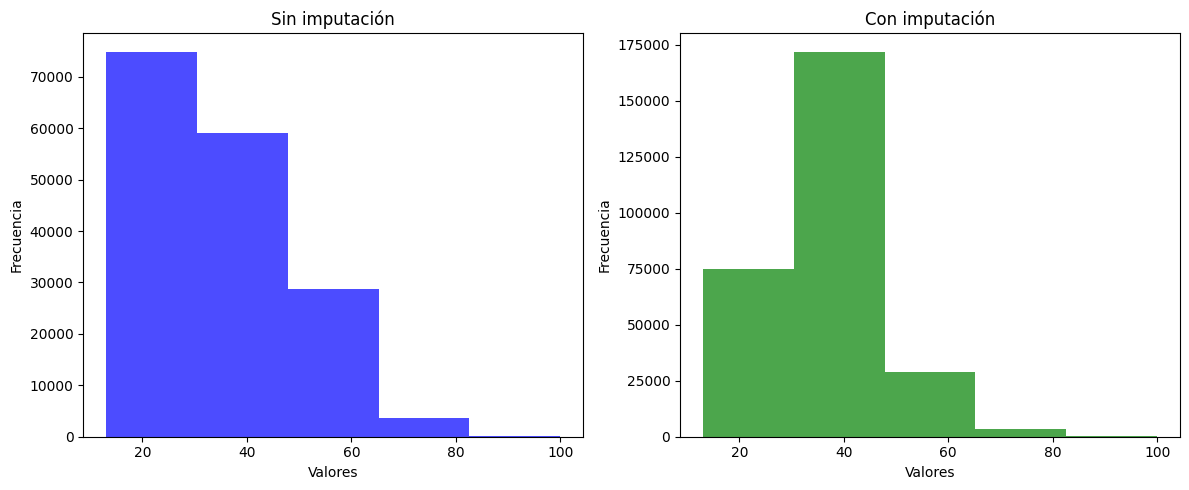

In [ ]:
# Imputación por media y verificación de cambios en los estadísticos
df_users['ageImputacion'] = df_users['ageCorrected'].fillna(df_users['ageCorrected'].mean())

# Crear una figura con dos subplots (histogramas)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de la primera columna
axs[0].hist(df_users['ageCorrected'], bins=5, color='blue', alpha=0.7)
axs[0].set_title('Sin imputación')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Frecuencia')

# Histograma de la segunda columna
axs[1].hist(df_users['ageImputacion'], bins=5, color='green', alpha=0.7)
axs[1].set_title('Con imputación')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
# Calcular estadísticas antes y después de la imputación
df_users['ageCorrected'].describe()

,ageCorrected
count,166264.000000
mean,34.833247
std,13.577765
min,13.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,100.000000


In [ ]:
df_users['ageImputacion'].describe()

,ageImputacion
count,278858.000000
mean,34.833247
std,10.484201
min,13.000000
25%,29.000000
50%,34.833247
75%,35.000000
max,100.000000


In [ ]:
# La distribución de los datos se ve afectada al imputar los datos.
# La desviación estandar pasa de 13.5 a 10.4
# Al convertir en nulos los datos fuera del rango elegido (13-100) el porcentaje de datos faltantes llega al 40%
# Se concluye eliminar la columna Age (junto con AgeImputacion y AgeCorrected)
df_users1 = df_users.drop(columns=['age', 'ageImputacion', 'ageCorrected'])
df_users1

,userID,location
0,1,"nyc, new york, usa"
1,2,"stockton, california, usa"
2,3,"moscow, yukon territory, russia"
3,4,"porto, v.n.gaia, portugal"
4,5,"farnborough, hants, united kingdom"
...,...,...
278853,278854,"portland, oregon, usa"
278854,278855,"tacoma, washington, united kingdom"
278855,278856,"brampton, ontario, canada"
278856,278857,"knoxville, tennessee, usa"


In [ ]:
import re

# Convertir filas de Location a minuscula
df_users['location'] = df_users['location'].astype(str).str.lower()
# Función para eliminar duplicados dentro de las cadenas en Location
def remove_duplicates(location):
    if pd.isna(location):  # Si el valor es NaN, simplemente lo devuelve
        return location
    parts = location.split(',')
    stripped_parts = [part.strip() for part in parts]  # Eliminar espacios al principio y al final
    unique_parts = list(dict.fromkeys(stripped_parts))  # Elimina duplicados y mantiene el orden
    return ', '.join(unique_parts)


# Aplicar la función a la columna 'Location'
df_users1['location'] = df_users1['location'].apply(remove_duplicates)

# Función para eliminar signos extraños
def remove_special_characters(location):
    if pd.isna(location):  # Si el valor es NaN, simplemente lo devuelve
        return location
    # Eliminar cualquier carácter que no sea alfanumérico, espacio, o coma
    cleaned_location = re.sub(r'[^a-zA-Z, ]+', '', location)
    return cleaned_location

# Aplicar la función a la columna 'Location'
df_users1['location'] = df_users1['location'].apply(remove_special_characters)



In [ ]:
# Visualizamos propiedades de las cadenas de Localidad

# Si cada fila tiene la misma cantidad de comas, separamos la columna en 3 columnas
comma_counts = df_users1['location'].str.count(',')
print(f" Valores únicos de comas en location: {comma_counts.unique()}")

#Dividimos en cantidad de comas por Location para saber cual tipo de Location es mas común
comma_distribution = comma_counts.value_counts().sort_index()
comma_distribution

 Valores únicos de comas en location: [2 1 0 3 4 5 8 7]


,count
location,
0,418
1,20954
2,256331
3,1108
4,32
5,12
7,2
8,1


In [ ]:
# Borrable

# df_users1['location'].head()
df_users1.loc[df_users1['location'].str.count(',') == 1]


,userID,location
12,13,"barcelona, spain"
17,18,"rio de janeiro, brazil"
18,19,"weston,"
48,49,"rome, italy"
64,65,"na, australia"
...,...,...
278788,278789,"new york, usa"
278798,278799,"hamburg, germany"
278802,278803,"shanghai, china"
278810,278811,", china"


In [ ]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 32.1 MB/s eta 0:00:00


In [ ]:
import pycountry

# Crear lista de países
countries = [country.name.lower() for country in pycountry.countries]

# Crear lista de provincias con su respectivo país
province_to_countries = {}

# Iterar sobre los países
for country in pycountry.countries:
    # Obtener subdivisiones (provincias/estados) del país
    subdivisions = pycountry.subdivisions.get(country_code=country.alpha_2)
    if subdivisions:
        for subdivision in subdivisions:
            province_name = subdivision.name.lower()
            country_name = country.name.lower()
            province_to_countries[province_name] = country_name

In [ ]:
# countries.append('iran')
# countries.append('russia')
# countries.append('usa')
# countries.append('germany')


In [ ]:
# Función para extraer el país usando el diccionario y eliminarlo de la columna Location
def extract_and_remove_country(location):
    if pd.isna(location):  # Si el valor es NaN, simplemente lo devuelve
        return location, None
    parts = location.lower().split(',')  # Divide el row en partes según las comas y convierte a minúsculas

    # Comparar con los países
    country = next((country for country in countries if any(part.strip() == country for part in parts)), None)

    if not country:  # Si no se encontró en países, comparar con provincias
        country = next((province_to_countries[part.strip()] for part in parts if part.strip() in province_to_countries), None)

    if country:  # Si se encontró country
        parts = [part for part in parts if part.strip() != country and province_to_countries.get(part.strip(), None) != country]  # Almacena las partes en el row de location ignorando country

    return ', '.join(parts).strip(), country

# Aplicar la función a la columna 'location'
df_users1[['location', 'country']] = df_users1['location'].apply(lambda x: pd.Series(extract_and_remove_country(x)))


In [ ]:
df_users1.iloc[100:200]

,userID,location,country
100,101,"nagpur, idaho",india
101,102,"barcelona, na",spain
102,103,"litchfield park, usa",united states
103,104,"foxboro, usa",united states
104,105,hull,united kingdom
...,...,...,...
195,196,"subang jaya, selangor darul ehsan",malaysia
196,197,brantford,canada
197,198,augsburg,germany
198,199,"austin, usa",united states


In [ ]:
# Vemos cantidad de rows de Country encontradas
country_values = df_users1['country'].notna().sum()
country_missing = df_users1['country'].isna()

print(f"Cantidad de valores de Country: {country_values}")
print(f"Cantidad de valores faltantes en Country: {country_missing.sum()}")
print(f"Proporción de datos faltantes en Country: {country_missing.sum() / len(df_users1)}")


# Hemos llenado country solo al 51%

Cantidad de valores de Country: 273269
Cantidad de valores faltantes en Country: 5589
Proporción de datos faltantes en Country: 0.020042458885884573


In [ ]:
#Vemos los missing values
df_users1[df_users1['country'].isna()]

,userID,location,country
2,3,"moscow, yukon territory, russia",None
18,19,"weston,",None
90,91,"torontonewmarket,",None
149,150,"mashhad, islam, iran",None
186,187,"mcas futenma fpo ap okinawa, na, usa",None
...,...,...,...
278568,278569,"ann arbor,",None
278594,278595,"zmir, na, turkey",None
278651,278652,"murrieta,",None
278668,278669,"spring hill, fl, hernando",None


## Tratamiento de df_genres

In [ ]:
# Visualizar información de df_genres
info_str = []

# Agregar la salida de head()
info_str.append("Head of df_genres:")
info_str.append(df_genres.head().to_string())
info_str.append(f"-------------------------")

# Agregar la salida de describe()
info_str.append("\n\nDescription of df_genres:")
info_str.append(df_genres.describe().to_string())
info_str.append(f"-------------------------")

# Agregar la salida de info()
info_str.append("\n\nInfo of df_genres:")
buffer = StringIO()
df_genres.info(buf=buffer)
info_str.append(buffer.getvalue())
info_str.append(f"-------------------------")

# Agregar la salida de dtypes
info_str.append("\n\nData types of df_genres:")
info_str.append(df_genres.dtypes.to_string())
info_str.append(f"-------------------------")


#Modificamos los nombres de las columnas
df_genres.columns = ['bookID', 'genre']

# Concatenar toda la información en una sola cadena y mostrarla
print("\n".join(info_str))


#Añado una mejor visualización a la ultima salida dtypes
for col in df_genres.columns:
    # unique_values = df_books[col].unique()
    unique_types = df_genres[col].apply(type).unique()

    print(f"Columna '{col}':")
    print(f"  Tipos de datos únicos: {unique_types}\n")


Head of df_genres:
   book_id                                                                                 genres
0  5333265                                          {'history, historical fiction, biography': 1}
1  1333909                          {'fiction': 219, 'history, historical fiction, biography': 5}
2  7327624  {'fantasy, paranormal': 31, 'fiction': 8, 'mystery, thriller, crime': 1, 'poetry': 1}
3  6066819                        {'fiction': 555, 'romance': 23, 'mystery, thriller, crime': 10}
4   287140                                                                     {'non-fiction': 3}
-------------------------


Description of df_genres:
            book_id
count  2.360655e+06
mean   1.540953e+07
std    1.081897e+07
min    1.000000e+00
25%    5.979046e+06
50%    1.585681e+07
75%    2.438194e+07
max    3.653043e+07
-------------------------


Info of df_genres:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360655 entries, 0 to 2360654
Data columns (total 2 columns):


In [ ]:
df_genres.head()

,bookID,genre
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}


---
---


In [ ]:
# Bucle para iterar sobre cada columna del df_books y verificar que hay datos unicos

# # Lista de dataframes
# dataframes = [df_rating, df_books, df_users]

# for i, df in enumerate(dataframes):
#   print(f"\nRevisando {dataframes[i]}:")
#   for col in df.columns:
#       unique_values = df[col].unique()
#       # unique_types = df[col].apply(type).unique()

#       print(f"Columna '{col}':")
#       print(f"  Datos únicos: {unique_values}")
#       # print(f"  Tipos de datos únicos: {unique_types}\n")
#   print(f"-------------------------")

---


In [ ]:
# Creamos nuevos datasets combinando los anteriores
rating_book = pd.merge(df_rating.dropna(), df_books.dropna(), on='ISBN')
all_ratings = pd.merge(rating_book, df_users1.dropna(), on='userID')

#Comprensión de los datos

In [ ]:
df_books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


## Distribución por año de publicación

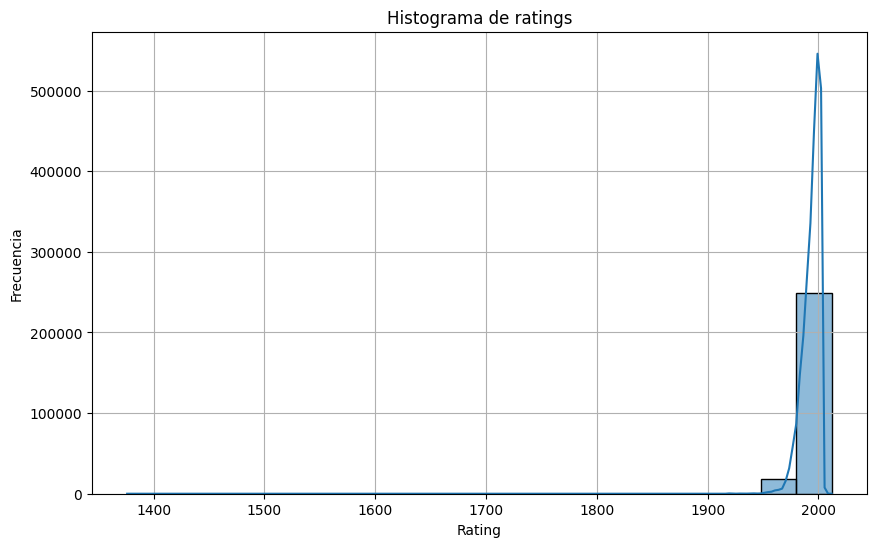

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df_books['yearOfPublication'], bins=20, kde=True)
plt.title('Histograma de ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Upset diagram para conjuntos generos por usuarios para visualizar cuales son los generos mas frecuentados por los usuarios de goodreads

In [ ]:
#FALTA

## Heatmap sobre mapa geográfico

In [ ]:
import geopandas as gpd
import folium
from folium.plugins import HeatMap

# Contar el número de usuarios por país
country_counts = df_users1['country'].value_counts().reset_index()
country_counts.columns = ['country', 'userCount']

# Cargar el shapefile del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Unir el DataFrame de usuarios con el DataFrame del mundo
world = world.rename(columns={'name': 'country'})
world['country'] = world['country'].str.lower()
merged = world.set_index('country').join(country_counts.set_index('country'))

# Crear un mapa base
m = folium.Map(location=[20, 0], zoom_start=2)

# Crear una lista de coordenadas y valores para el HeatMap
heat_data = [[row['geometry'].centroid.y, row['geometry'].centroid.x, row['userCount']] for index, row in merged.iterrows() if pd.notnull(row['userCount'])]

# Añadir HeatMap al mapa
HeatMap(heat_data).add_to(m)

# Guardar el mapa en un archivo HTML
m.save('user_density_map.html')

# Mostrar el mapa en Jupyter Notebook (si estás usando Jupyter)
m


<ipython-input-59-456a452a5cee>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Barplot de paises con mas de 2 mil usuarios

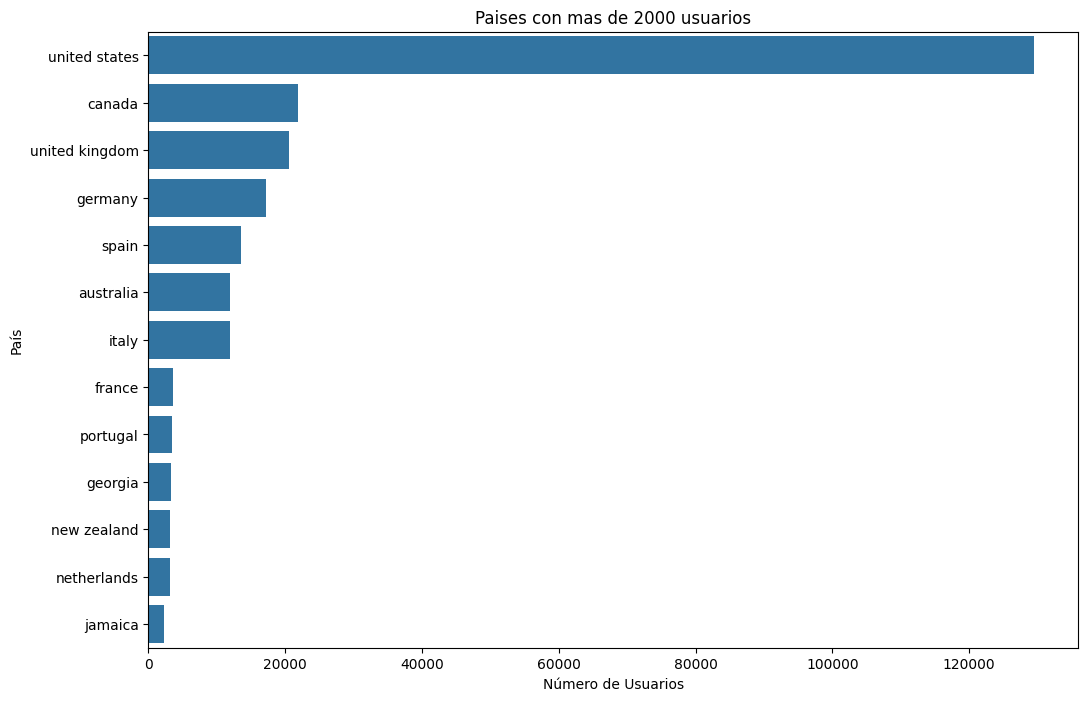

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cantidadUsuarios = 2_000

# Contar el número de usuarios por país
country_counts = df_users1['country'].value_counts().reset_index()
country_counts.columns = ['country', 'userCount']

# Filtrar los países con al menos un número significativo de usuarios
country_counts_top = country_counts[country_counts['userCount'] > cantidadUsuarios]

# Gráfica de barras para densidad de usuarios por país
plt.figure(figsize=(12, 8))
sns.barplot(x='userCount', y='country', data=country_counts_top)
plt.title(f'Paises con mas de {cantidadUsuarios} usuarios')
plt.xlabel('Número de Usuarios')
plt.ylabel('País')
plt.show()


## Distribución de ratings

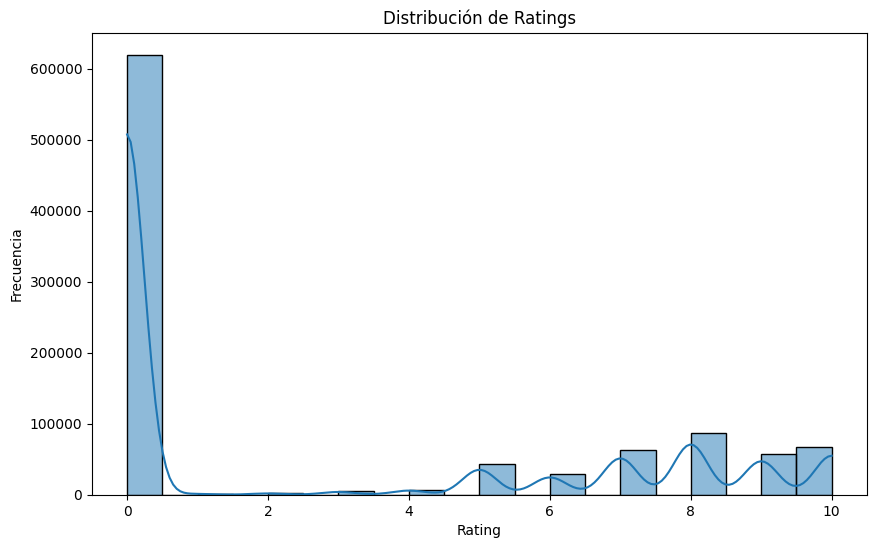

In [ ]:
#Visualización de distribución de ratings
plt.figure(figsize=(10, 6))
sns.histplot(all_ratings['bookRating'], bins=20, kde=True)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


Hay una tendencia a dejar ratings = 0.
Para visualizar mejor la distribución del resto de ratings, se ignorará ratings = 0 en la siguiente gráfica

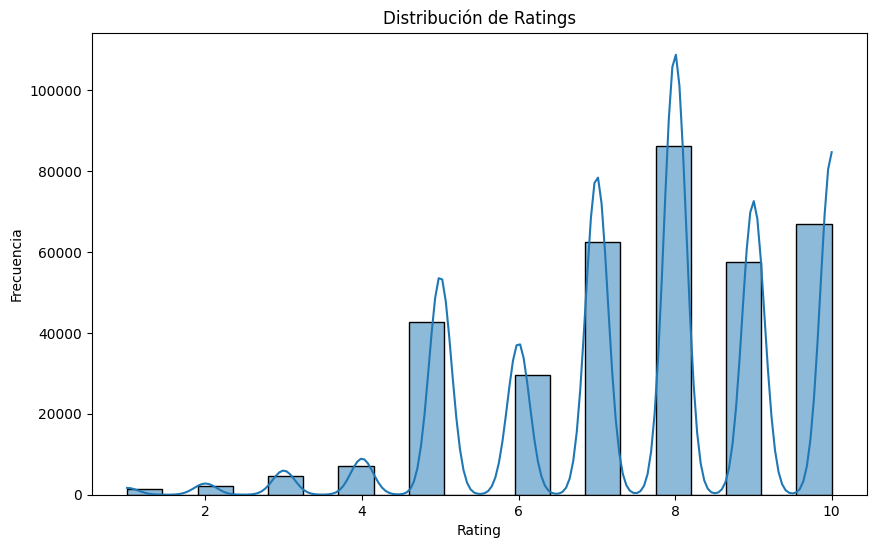

In [ ]:
#Visualización de deistribución de ratings
plt.figure(figsize=(10, 6))
sns.histplot(all_ratings[all_ratings['bookRating'] != 0]['bookRating'], bins=20, kde=True)
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

## Autores mas leidos y género de libros

In [ ]:
# FALTA

## Características de libros mas calificados
Falta

## Características de libros mejor calificados
Falta

## Características de autores mas calificados
Falta

## Características de autores mejor calificados
Falta

## Tendencia de generos mas calificados
FALTA

## Relación ratings - año publicación
FALTA

## Tendencia de géneros por pais
FALTA

## Barplot paises con mas de 10 mil ratings

<ipython-input-64-6379aea0dda1>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ratingsCount', y='country', data=top_countries, palette='viridis')


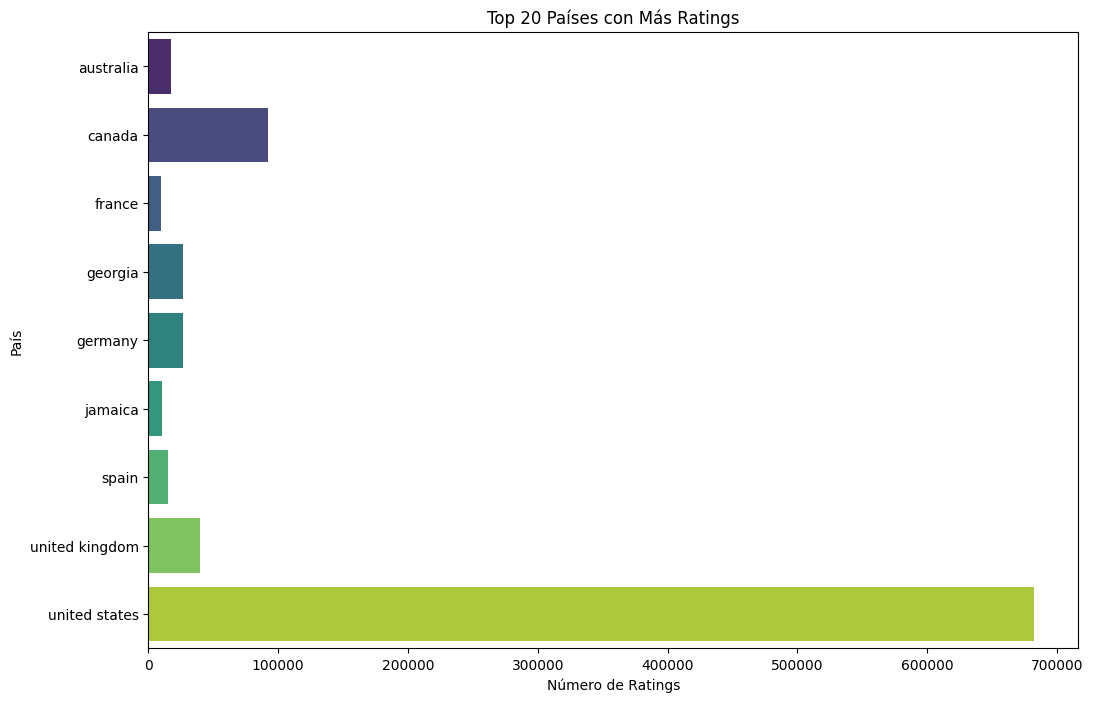

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ratingsCounts = 10_000

# Contar el número de ratings por país
country_activity = all_ratings.groupby('country')['bookRating'].count().reset_index()
country_activity.columns = ['country', 'ratingsCount']

# Ordenar por RatingsCount en orden descendente y seleccionar los 20 primeros países
# top_countries = country_activity.sort_values(by='ratingsCount', ascending=False).head(20)
top_countries = country_activity[country_activity['ratingsCount'] > ratingsCounts]

# Gráfica de barras para los 20 países con más ratings
plt.figure(figsize=(12, 8))
sns.barplot(x='ratingsCount', y='country', data=top_countries, palette='viridis')
plt.title('Top 20 Países con Más Ratings')
plt.xlabel('Número de Ratings')
plt.ylabel('País')
plt.show()

## Mapa con Clusters para visualizar densidad de usuarios por

Se decidió entre un dendrograma, histograma y diagrama de dispersión. La visibilidad es mejor en el diagrama de dispersión.


In [ ]:
# import pandas as pd
# import scipy.cluster.hierarchy as sch
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import AgglomerativeClustering

# # Datos de ejemplo: suponemos que 'df_users1' contiene algunas características adicionales de los países.
# # Asegúrate de que estas características sean numéricas para poder realizar el clustering.
# # data = df_users1.set_index('country')  # Ajusta según tus datos reales

# # Contar el número de usuarios por país
# data = df_users1['country'].value_counts().reset_index()
# country_counts.columns = ['country', 'userCount']

# # Filtrar los países con al menos un número significativo de usuarios (cantidadUsuarios)
# data = country_counts[country_counts['userCount'] > cantidadUsuarios]


# # Normalizar los datos
# scaler = StandardScaler()
# data_normalized = scaler.fit_transform(data)

# # Crear el dendrograma
# plt.figure(figsize=(10, 7))
# dendrogram = sch.dendrogram(sch.linkage(data_normalized, method='ward'))

# # Definir la cantidad de clusters deseados
# num_clusters = 5
# hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
# labels = hc.fit_predict(data_normalized)

# # Añadir los labels (clusters) al DataFrame original
# df_users1['Cluster'] = labels

# hc


In [ ]:
# plt.figure(figsize=(10, 7))
# plt.hist(country_counts['userCount'], bins=bins, edgecolor='black')
# plt.title('Distribución de usuarios por país')
# plt.xlabel('Número de usuarios')
# plt.ylabel('Número de países')
# plt.show()

In [ ]:
!pip install plotly

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings

def elbowMethod(X, stringData):
  warnings.filterwarnings("ignore")

  if isinstance(X, str):

    count = 0

    for X in X:
      inertia = []

      #Errores tipo n_samples=7 >= n_clusters = 8 implican que hay menos paises que
        #clusters lo que es un error en la formación de la columna country. Me dió este error porque se crearon solo 7 paises
        #En celdas anteriores asigné a country_counts = country_counts > condición lo que redujo la cantidad de country. Eso está arreglado cambiando el nombre de esas variables que obtienen un segmento de country_counts
      K = range(1, 11)
      for k in K:
          kmeans = KMeans(n_clusters=k, random_state=42)
          kmeans.fit(X)
          inertia.append(kmeans.inertia_)

      # Graficar el método del codo
      plt.figure(figsize=(8, 6))
      plt.plot(K, inertia, 'bx-')
      plt.xlabel('Número de Clusters')
      plt.ylabel('Inercia')
      plt.title(stringData[count])

      count += 1

  else:
    inertia = []

    #Errores tipo n_samples=7 >= n_clusters = 8 implican que hay menos paises que
      #clusters lo que es un error en la formación de la columna country. Me dió este error porque se crearon solo 7 paises
      #En celdas anteriores asigné a country_counts = country_counts > condición lo que redujo la cantidad de country. Eso está arreglado cambiando el nombre de esas variables que obtienen un segmento de country_counts
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Graficar el método del codo
    plt.figure(figsize=(8, 6))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.title(stringData)

  plt.show()

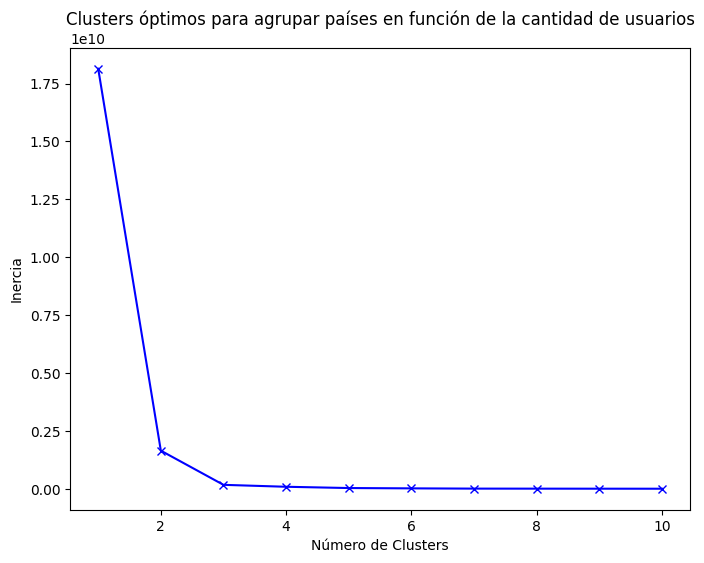

In [ ]:
# Definiendo el número de clusters para agrupar paises en función de la cantidad de usuarios
X = country_counts[['userCount']]
elbowMethod(X, 'Clusters óptimos para agrupar países en función de la cantidad de usuarios')


In [ ]:
#optimal_clusters se ajusta manualmente según los resultados de la gráfica anterior
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
country_counts['cluster'] = kmeans.fit_predict(X)


In [ ]:
import plotly.express as px

# Crear un gráfico de dispersión interactivo con clusters
fig = px.scatter(
    country_counts,
    x='country',
    y='userCount',
    color='cluster',  # Colorear por cluster
    hover_data={'country': True, 'userCount': True},  # Mostrar país y usuarios en el tooltip
    title='Distribución de países por número de usuarios agrupados en clusters',
    labels={'userCount': 'Número de usuarios', 'country': 'País'}
)

# Configurar el eje x para que no muestre etiquetas de los países
fig.update_xaxes(tickvals=[], ticktext=[])

# Obtener los colores utilizados para cada cluster
color_dict = {cluster: color for cluster, color in zip(country_counts['cluster'].unique(), fig.data[0].marker.color)}

# Mostrar el gráfico
fig.show()


Se puede osbervar que hay agrupaciones por cantidad de usuarios.
- Rojo: EEUU
- Amarillo: Canadá, United Kingdom, Germany, Spain, Italy, Australia
- Azul: el resto de paises `(len(country_counts['country'].unique()) - 7 = 190)`

In [ ]:
# country_activity.drop(['country', 'userCount_x', 'userCount_y', 'userCount'],axis=1)
country_activity = country_activity.merge(
    country_counts[['country', 'userCount']],  # Seleccionar solo las columnas necesarias de country_counts
    on='country',  # Columna común para fusionar
    how='left'  # Mantener todas las filas de country_activity, incluso si no hay coincidencia en country_counts
)


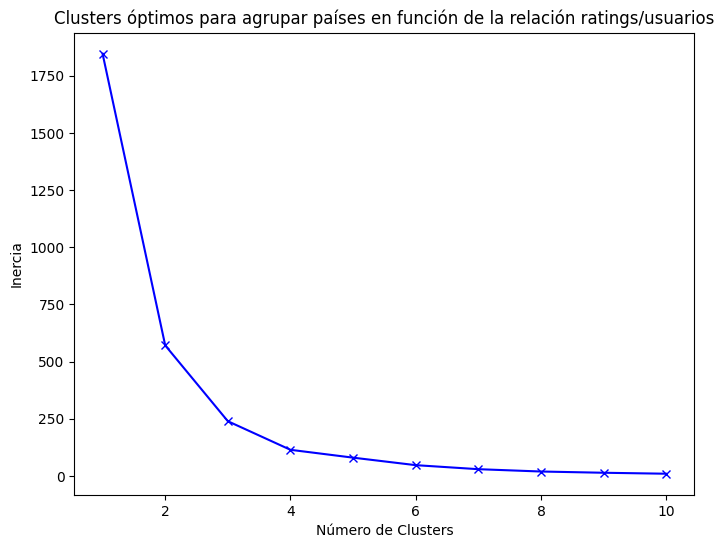

In [ ]:
# Aplicando la misma gráfica para el ratio de los ratings por pais

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

country_activity['ratio'] = country_activity['ratingsCount'] / country_activity['userCount']

X = country_activity[['ratio']]
elbowMethod(X, 'Clusters óptimos para agrupar países en función de la relación ratings/usuarios')

In [ ]:
#optimal_clusters se ajusta manualmente según los resultados de la gráfica anterior
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
country_activity['cluster'] = kmeans.fit_predict(X)

import plotly.express as px

fig = px.scatter(
    country_activity,
    x='country',
    y='ratio',
    color='cluster',
    hover_data={'country': True, 'ratio': True, 'userCount': True, 'ratingsCount': True},
    title='Distribución de países por proporción de ratings por usuario agrupados en clusters',
    labels={'ratio': 'Ratio Ratings/Users', 'country': 'País', 'userCount': 'Cantidad de Usuarios', 'ratingsCount': 'Cantidad de ratings'}
)

color_dict = {cluster: color for cluster, color in zip(country_activity['cluster'].unique(), fig.data[0].marker.color)}

fig.show()

Cantidad de ratings en proporción a cantidad de usuarios

Se visualizan 3 grupos casi bien definidos. Para ver mejor donde están ubicados, se mostrará un mapa donde se muestre cada pais del dataset respetando cada cluster

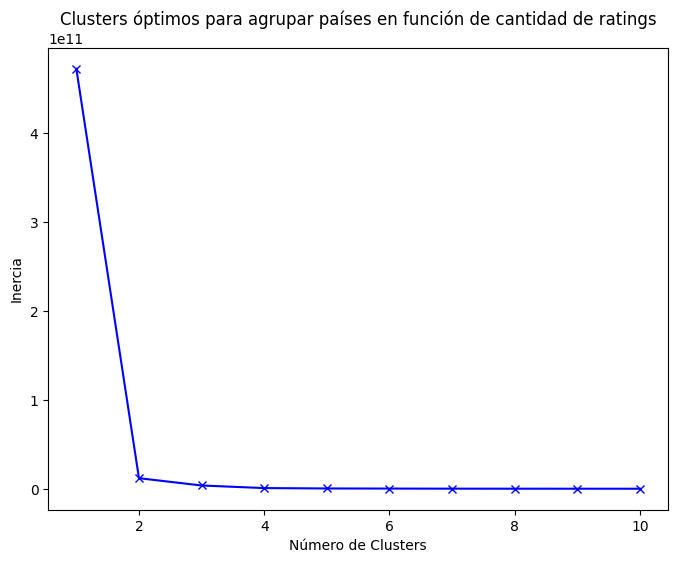

In [ ]:
# Aplicando la misma gráfica para cantidad de ratings por pais

X = country_activity[['ratingsCount']]
elbowMethod(X, 'Clusters óptimos para agrupar países en función de cantidad de ratings')

In [ ]:
#optimal_clusters se ajusta manualmente según los resultados de la gráfica anterior
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
country_activity['cluster'] = kmeans.fit_predict(X)

import plotly.express as px

fig = px.scatter(
    country_activity,
    x='country',
    y='ratingsCount',
    color='cluster',
    hover_data={'country': True, 'userCount': True},
    title='Distribución de países por cantidad de ratings',
    labels={'country': 'País', 'userCount': 'Cantidad de Usuarios', 'ratingsCount': 'Cantidad de ratings'}
)

color_dict = {cluster: color for cluster, color in zip(country_activity['cluster'].unique(), fig.data[0].marker.color)}

fig.show()

In [ ]:
from IPython import get_ipython

ipython = get_ipython()
history = ipython.history_manager.get_range(start=0, stop=None)

code_lines = 0
for code in history:
    code_lines += len(code[2].splitlines())

print(f"Líneas de código en la sesión: {code_lines}")


Líneas de código en la sesión: 865
